In [ ]:
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import phik
from random import choices
from scipy.stats import ttest_ind, levene, mannwhitneyu,shapiro, \
    f_oneway, kruskal, chi2_contingency, fisher_exact
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.metrics import roc_auc_score, roc_curve
import pingouin as pg

warnings.filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# for font in fm.findSystemFonts("../HSE_Slab"):
#     fm.fontManager.addfont(font)

sns.set_theme(context='talk', style='whitegrid', palette='deep')
plt.rcParams['figure.figsize'] = 12, 8
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 25
plt.rcParams['figure.titlesize'] = 32
plt.rcParams['axes.titlesize'] = 32
plt.rcParams['savefig.format'] = 'pdf'
plt.rcParams['figure.autolayout'] = 'true'
plt.rcParams['figure.frameon'] = 'false'
plt.rcParams['axes.spines.left'] = 'false'
plt.rcParams['axes.spines.right'] = 'false'
plt.rcParams['axes.spines.top'] = 'false'
plt.rcParams['legend.fancybox'] = 'false'
plt.rcParams['axes.spines.bottom'] = 'false'
# plt.rcParams['font.family'] = 'HSE Slab'
plt.rcParams['font.size'] = 20
plt.rcParams['figure.facecolor'] = '#F1F1F1'
plt.rcParams['axes.facecolor'] = '#F1F1F1'

# для графиков, где надо много цветов, юзайте воть:
sns.set_palette(sns.color_palette('deep'))
# а по дефолту воть:
sns.set_palette(sns.color_palette("BuGn_r", n_colors=10)[2:4])

pd.set_option('display.max_columns', 60)

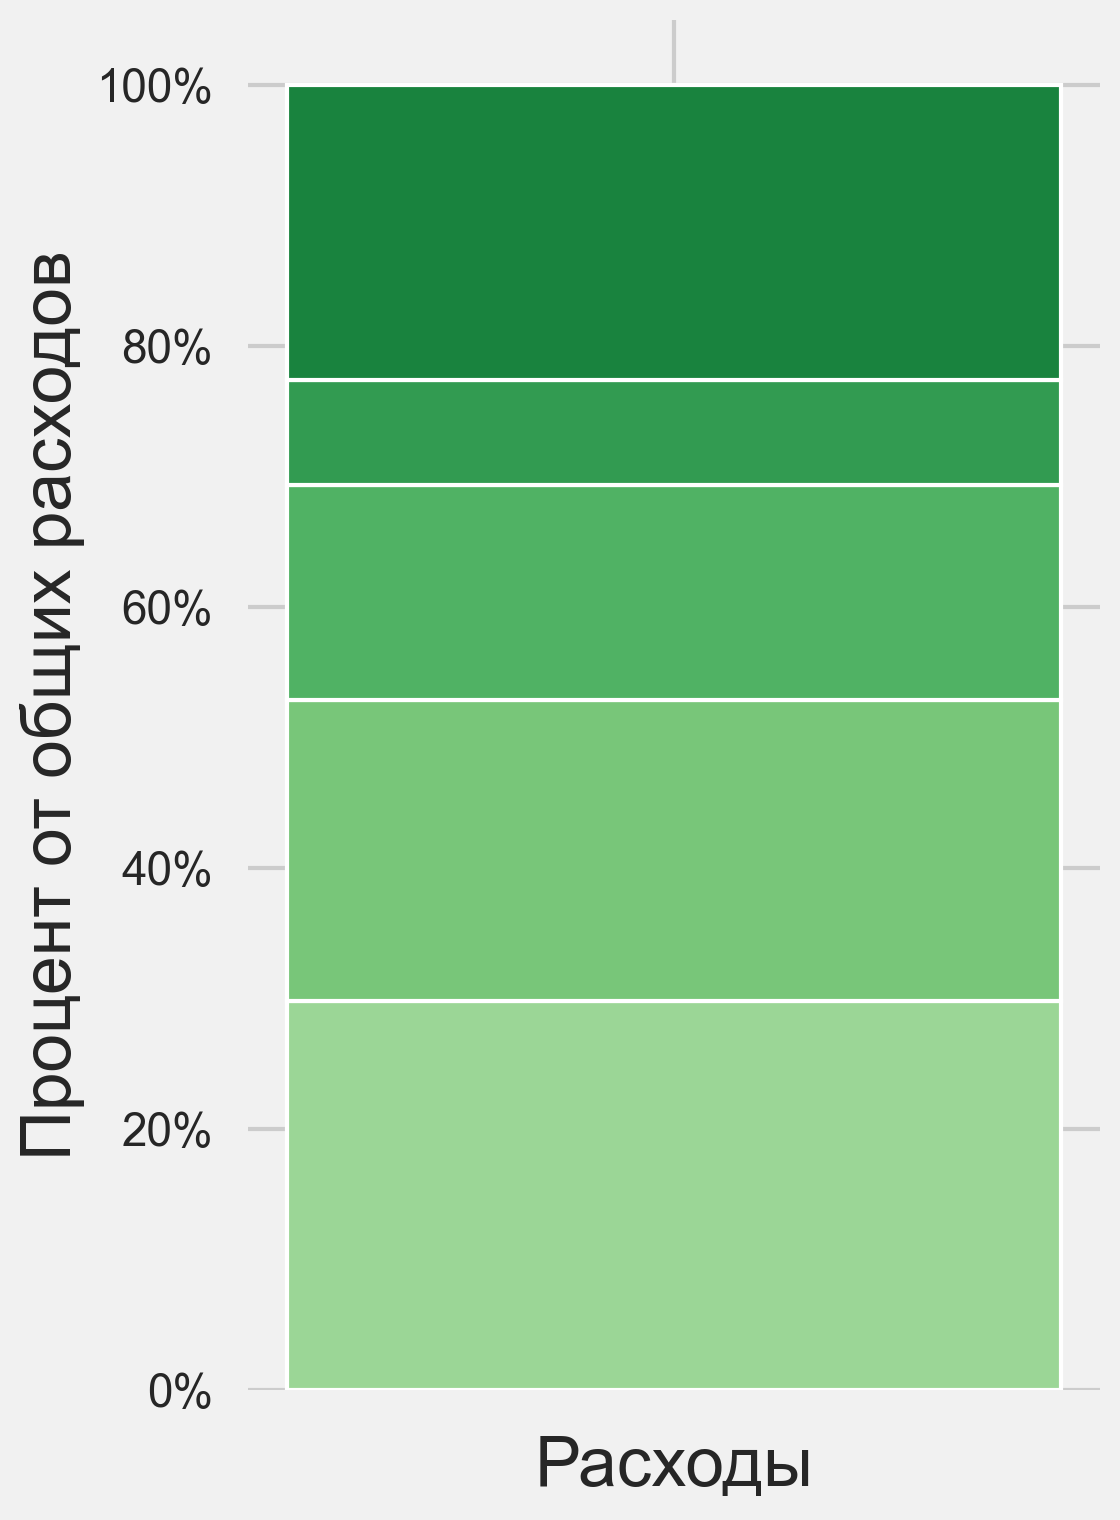

In [2]:
# шаблон для графика stacked barplot

# Исходные данные
dt = pd.Series({
    "продакт": 7892500,
    "дизайнер": 360000,
    "млщик": 26180000,
    "разработчик": 33750000,
    "тестировщики": 7161000,
    "сервера": 9114000,
    "реклама": 6400000,
    "сервера-млщикам": 18600000,
    "поиск-работников": 48000,
    "опрос": 1500,
    "бета-тест": 20000,
    "аналитик": 2772000,
    'pr-manager': 960000,
})

# Определяем топ-4 и категорию "другие"
top4 = dt.nlargest(4)
others = dt.sum() - top4.sum()

# Создаем новый Series с процентным соотношением
top4['другие'] = others
top4_percent = (top4 / top4.sum()) * 100  # Перевод в проценты

# Построение графика
fig, ax = plt.subplots(figsize=(6, 8))
bottom_val = 0

for i, (category, value) in enumerate(top4_percent.items()):
    ax.bar("Расходы", value, bottom=bottom_val, label=category, color=plt.cm.Greens((i+4) * 25))  # Используем зеленую палитру
    bottom_val += value
    
    
plt.yticks([i for i in range(0, 101, 20)], [f'{i}%' for i in range(0, 101, 20)])

# Настройка и легенда
#ax.set_title("Процентное соотношение расходов по категориям (топ-4 + другие)")
ax.set_ylabel("Процент от общих расходов")
ax.set_xlabel("Расходы")
ax.set_xticks([0], '')

#ax.legend(title="Категории", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()